In [1]:
from IPython.display import display, HTML

display(HTML(data="""

<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

%reload_ext jupyternotify

#%notify

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import sys

import qutip as qtp
import matplotlib.pyplot as plt
from pathlib import Path

from scipy import linalg as la

parent_path = ".."  #str(Path(__file__).resolve().parents[1])
sys.path.append(parent_path)

import pysqkit


import time
import os

from pysqkit.solvers.solvkit import integrate
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib notebook
plt.rcParams['figure.figsize'] = (10, 7)

In [152]:
from math import pi

h = 6.62607 * 10**(-34)
h_bar = h/(2*pi)
e = 1.6071766*10**(-19)
phi_0 = h/(2*e)

N = 100

# Init

In [153]:
J_c = .3 #300*10**6 *h
lam = .5

In [154]:
e_c_A = 1 #1*10**9 *h
e_l_A = 1.5 #1.5*10**9 *h
e_j_A = 3.8 #3.8*10**9 *h
flux_A = 1/2  # 1/2 -> pi dans le cos



e_c_B = 1 #1*10**9 *h
e_l_B = .9 #.9*10**9 *h
e_j_B = 3 #3*10**9 *h
flux_B = 1/2

omega_d = 2*pi * 1.15

In [203]:
param_exp_from_scratch = {
    'flxA' : pysqkit.qubits.Fluxonium(label = "QBA",
                               charge_energy=e_c_A,
                               induct_energy=e_l_A,
                               joseph_energy=e_j_A,
                               flux=flux_A,
                               basis=None,
                               dim_hilbert=N),
    'flxB' : pysqkit.qubits.Fluxonium(label = "QBB",
                               charge_energy=e_c_B,
                               induct_energy=e_l_B,
                               joseph_energy=e_j_B,
                               flux=flux_B,
                               basis=None,
                               dim_hilbert=N),
    'nb_levels_A' : 2,
    'nb_levels_B' : 2,
    'J_c' : J_c,
    'lam' : lam,
    'omega_d' : omega_d,
    'eta_A' : 1,
    'eta_B' : 1,
    't_rise' : 25,
    
    't_init' : 0,
    't_fin' : 4000,
    'N' : 10000,
    
    'jump_list' : [],
    
    'solver' : pysqkit.solvers.solvkit.supported_solvers[0]
}
param_exp_from_scratch['d'] = param_exp_from_scratch['nb_levels_A']*param_exp_from_scratch['nb_levels_B']


In [ ]:
t = np.linspace(0, 1000, 20000) #* 10**(-9) #in nano seconds

$$\hat{H} = \hat{H}^{(0)}_A + \hat{H}^{(0)}_B + \hat{V} + \hat{H}_{drive}$$

## flxA



$$\hat{H}^{(0)}_A = 4 E_{C,A} \cdot \hat{n}^2_A + \frac{1}{2}E_{L,A}\cdot\hat{\varphi}^2_A - E_{J,A}\cos\left(\hat{\varphi}_A - \phi_{ext,A}\right)$$

In [ ]:
e_c_A = 1 #1*10**9 *h
e_l_A = 1.5 #1.5*10**9 *h
e_j_A = 3.8 #3.8*10**9 *h
  
flux_A = 1/2  # 1/2 -> pi dans le cos

flxA = pysqkit.qubits.Fluxonium(label = "QBA",
                               charge_energy=e_c_A,
                               induct_energy=e_l_A,
                               joseph_energy=e_j_A,
                               flux=flux_A,
                               basis=None,
                               dim_hilbert=N)

flxA.diagonlize_basis(num_levels=5)
flxA.hamiltonian(as_qobj = True)

In [ ]:
#Bare energies

bare_E_A = flxA.eig_energies(levels = 5)
bare_E_A

In [ ]:
# transitions freqs

omega_01_A = bare_E_A[1] - bare_E_A[0]
omega_12_A = bare_E_A[2] - bare_E_A[1]

omega_01_A , omega_12_A

In [ ]:
# mat elements :

n_10_A = np.abs(flxA.mat_elements('charge_op', levels = 5)).data[1,0]
n_01_A = np.abs(flxA.mat_elements('charge_op', levels = 5)).data[0,1]

np.round(np.abs(flxA.mat_elements('charge_op', levels = 5)).data, 2), n_01_A, n_10_A

### Rq)

In [ ]:
plt.figure()
for i in range(len(bare_E_A)):
    plt.scatter(i, bare_E_A[i])

In [ ]:
flxA.charge_op(as_qobj = True)

In [ ]:
flxA.charge_zpf*(create(100) - destroy(100))*1j

In [ ]:
flxA.charge_op(as_qobj = True)

In [ ]:
flxA.hamiltonian(as_qobj = True)/(h*10**9)

## flxB

$$\hat{H}^{(0)}_B = 4 E_{C,B} \cdot \hat{n}^2_B + \frac{1}{2}E_{L,B}\cdot\hat{\varphi}^2_B - E_{J,B}\cos\left(\hat{\varphi}_B - \phi_{ext,B}\right)$$

In [ ]:
e_c_B = 1 #1*10**9 *h
e_l_B = .9 #.9*10**9 *h
e_j_B = 3 #3*10**9 *h

flux_B = 1/2

flxB = pysqkit.qubits.Fluxonium(label = "QBB",
                               charge_energy=e_c_B,
                               induct_energy=e_l_B,
                               joseph_energy=e_j_B,
                               flux=flux_B,
                               basis=None,
                               dim_hilbert=N)

In [ ]:
flxB.diagonlize_basis(num_levels=5)

In [ ]:
#Bare energies

bare_E_B = flxB.eig_energies(levels = 5)
bare_E_B

In [ ]:
# transitions freqs

omega_01_B = bare_E_B[1] - bare_E_B[0]
omega_12_B = bare_E_B[2] - bare_E_B[1]

omega_01_B , omega_12_B

In [ ]:
# mat elements :

n_10_B = np.abs(flxB.mat_elements('charge_op', levels = 5)).data[1,0]
n_01_B = np.abs(flxB.mat_elements('charge_op', levels = 5)).data[0,1]

np.round(np.abs(flxB.mat_elements('charge_op', levels = 5)).data, 2), n_01_B, n_10_B

## coupling


$$\hat{V} = J_C \cdot \hat{n}_A \cdot \hat{n}_B$$

In [ ]:
g = J_c#J_c/(4*e**2)
duo = flxA.couple_to(flxB, pysqkit.couplers.capacitive_coupling, strength = g)
duo.eig_energies()

In [ ]:
H_duo_bare = duo.bare_hamiltonian(as_qobj = True)
H_duo_int = duo.int_hamiltonian(as_qobj = True)

In [ ]:
H_duo_tot = duo.hamiltonian(as_qobj = True)

# qtp.Qobj(H_duo_bare.full() + H_duo_int.full(), dims = H_duo_bare.dims,  #dims = [[25], [25]]
#                  shape=H_duo_bare.shape,
#                 type='oper',
#                 isherm=True)


In [ ]:
H_duo_tot

### rqs

In [ ]:
duo.bare_hamiltonian(), duo.int_hamiltonian()

In [ ]:
#Bare energies

bare_E_duo = la.eig(duo.bare_hamiltonian())[0].real/h #in Hz
bare_E_duo.sort()
bare_E_duo = bare_E_duo[:5]*10**(-9)  #in GHz

int_E_duo = la.eig(duo.int_hamiltonian())[0].real/h
int_E_duo.sort()
int_E_duo = int_E_duo[:5]*10**(-9)

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (10,5))

axs[0].scatter(range(len(bare_E_duo)), bare_E_duo, c = 'r', label = 'bare')    
axs[1].scatter(range(len(int_E_duo)), int_E_duo, c = 'b', label = 'int')

axs[0].legend()
axs[1].legend()

axs[0].set_ylabel("E (GHz)")
axs[1].set_ylabel("E (GHz)")

In [ ]:
E_duo = bare_E_duo + int_E_duo
E_duo.sort()

plt.figure()
plt.scatter(range(len(E_duo)), E_duo)

plt.annotate("  |00>", (0,E_duo[0]))
plt.annotate("  |01>", (1,E_duo[1]))
plt.annotate("  |10>", (2,E_duo[2]))
plt.annotate("  |11>", (3,E_duo[3]))
plt.annotate("  |??>", (4,E_duo[4]))




plt.ylabel('E (GHz)')

In [ ]:
print("Ground =", E_duo[0], "GHz\n1st state =", E_duo[1], "GHz\n2nd state =", E_duo[2], "GHz" )

print("\n\nomega 00->01 =", E_duo[1]-E_duo[0], "GHz\nomega 01->10 =", E_duo[2] - E_duo[1], "GHz\nomega 10->11 =", E_duo[3]-E_duo[2], "GHz"
     )

In [ ]:
duo.hamiltonian()

## Drive

$$\hat{H}_{drive} = 2  f\left( t \right)  \cos \left( \omega_d t + \gamma_d\right) \cdot \left( \eta_A \cdot \hat{n}_A + \eta_B \cdot \hat{n}_B \right)$$

$$f\left( t \right) = f_0 \cdot \dfrac{f\left( t \right)}{f_0}$$

In [ ]:
f_0 = lam/2 * np.abs(omega_01_A - omega_01_B) / (n_10_A)

In [ ]:
t_rise = 25
sigma = t_rise/2

f_by_f0 = np.exp(- (t-t_rise)**2 / (2*sigma**2)) - np.exp(-t_rise**2 /(2*sigma**2))*np.ones(len(t))

f = f_0 * f_by_f0

omega_d = 2*pi * 1.15
gamma_d = 0

pulse = 2 * f * np.cos(omega_d*t)

In [ ]:
eta_A = 1
eta_B = 1

n_A = flxA.charge_op(as_qobj = True)
n_B = flxB.charge_op(as_qobj = True)

drive = qtp.tensor(n_A, qtp.qeye(5))*eta_A + qtp.tensor(qtp.qeye(5), n_B)*eta_B
drive

### Rq)

# Simu

##  With Solver

In [ ]:
time =  t

state_init = qtp.tensor(qtp.Qobj(np.ones(5)/np.sqrt(5)), qtp.Qobj(np.array([1,0,0,0,0])))  .unit()
density_mat_init = state_init * state_init.dag()

#the first is in superposition of 0 through 4 and the second at ground

hamil = H_duo_tot
drive_solver = [drive]
pulse_solver = [pulse]
jump = []
solver = pysqkit.solvers.solvkit.supported_solvers[0]

In [ ]:
density_mat_init

In [ ]:
res = integrate(time, density_mat_init, hamil, drive_solver, pulse_solver, jump, solver)

In [ ]:
res.states[-1]*1

# Automatisation

## Functions

In [6]:
def gate(state_init, **kwargs):
                
    duo_H = kwargs['duo_H']
    drive_list = kwargs['drive_list']
    pulse_fct_list = kwargs['pulse_fct_list']
    jump_list = kwargs['jump_list']
    solver = kwargs['solver']
    
    time = np.linspace(kwargs['t_init'], kwargs['t_fin'], kwargs['N'])
    
    pulse_list = []
    for i in range(len(pulse_fct_list)):
        pulse_list.append(pulse_fct_list[i](time, **kwargs))
        
    res = integrate(time, state_init, duo_H, drive_list, pulse_list, jump_list, solver)
    
    return res.states[-1]

In [7]:
def gate_exp_from_scratch(state_init, **kwargs):
    #copy to avoid changing parameters 
    flxA = pysqkit.qubits.Fluxonium(label = "QBA",
                               charge_energy=kwargs['flxA'].charge_energy,
                               induct_energy=kwargs['flxA'].induct_energy,
                               joseph_energy=kwargs['flxA'].joseph_energy,
                               flux=kwargs['flxA'].flux,
                               basis=None,
                               dim_hilbert=kwargs['flxA'].dim_hilbert)
    
    flxB = pysqkit.qubits.Fluxonium(label = "QBB",
                               charge_energy=kwargs['flxB'].charge_energy,
                               induct_energy=kwargs['flxB'].induct_energy,
                               joseph_energy=kwargs['flxB'].joseph_energy,
                               flux=kwargs['flxB'].flux,
                               basis=None,
                               dim_hilbert=kwargs['flxB'].dim_hilbert)

    
    
    #prep A
    flxA.diagonlize_basis(num_levels=kwargs['nb_levels_A'])
    bare_E_A = flxA.eig_energies()
    omega_01_A = bare_E_A[1] - bare_E_A[0]
#     omega_12_A = bare_E_A[2] - bare_E_A[1]
    n_10_A = np.abs(flxA.mat_elements('charge_op')).data[1,0]
    n_01_A = np.abs(flxA.mat_elements('charge_op')).data[0,1]
    
    #pres B
    flxB.diagonlize_basis(num_levels=kwargs['nb_levels_B'])
    bare_E_B = flxB.eig_energies()
    omega_01_B = bare_E_B[1] - bare_E_B[0]
#     omega_12_B = bare_E_B[2] - bare_E_B[1]
    n_10_B = np.abs(flxB.mat_elements('charge_op')).data[1,0]
    n_01_B = np.abs(flxB.mat_elements('charge_op')).data[0,1]
    
    #build duo
    duo = flxA.couple_to(flxB, pysqkit.couplers.capacitive_coupling, strength = J_c)
    H_duo_tot = duo.hamiltonian(as_qobj = True)

    #build drive
    n_A = flxA.charge_op(as_qobj = True)
    n_B = flxB.charge_op(as_qobj = True)
    drive = qtp.tensor(n_A, qtp.qeye(kwargs['nb_levels_B']))*kwargs['eta_A'] + \
            qtp.tensor(qtp.qeye(kwargs['nb_levels_A']), n_B)*kwargs['eta_B']
    
    #build pulse_fct
    def pulse_fct(t, **kwargs):
        f_0 = kwargs['lam']/2 * np.abs(kwargs['omega_01_A'] - kwargs['omega_01_B']) / (kwargs['n_10_A'])
        t_rise = kwargs['t_rise']
        sigma = t_rise/2

        f = f_0 * (np.exp(- (t-t_rise)**2 / (2*sigma**2)) - np.exp(-t_rise**2 /(2*sigma**2)))
    
        pulse = 2 * f * np.cos(kwargs['omega_d']*t)
        
        return pulse
    #def another dictionnary
    param_gate = {}
    for string in kwargs.keys():
        param_gate[string] = kwargs[string]
        
    param_gate['omega_01_A'] = omega_01_A
    param_gate['omega_01_B'] = omega_01_B
    param_gate['n_10_A'] = n_10_A
    param_gate['duo_H'] = duo.hamiltonian(as_qobj = True)
    param_gate['drive_list'] =  [drive]
    param_gate['pulse_fct_list'] = [pulse_fct]
    
    
    return gate(state_init, **param_gate)                                                                 
                                                                     
                                                                     

## Exp

In [ ]:
param_exp_from_scratch = {
    'flxA' : pysqkit.qubits.Fluxonium(label = "QBA",
                               charge_energy=e_c_A,
                               induct_energy=e_l_A,
                               joseph_energy=e_j_A,
                               flux=flux_A,
                               basis=None,
                               dim_hilbert=N),
    'flxB' : pysqkit.qubits.Fluxonium(label = "QBB",
                               charge_energy=e_c_B,
                               induct_energy=e_l_B,
                               joseph_energy=e_j_B,
                               flux=flux_B,
                               basis=None,
                               dim_hilbert=N),
    'nb_levels_A' : 2,
    'nb_levels_B' :2,
    'J_c' : J_c,
    'lam' : lam,
    'omega_d' : omega_d,
    'eta_A' : 1,
    'eta_B' : 1,
    't_rise' : 25,
    
    't_init' : 0,
    't_fin' : 1000,
    'N' : 10000,
    
    'jump_list' : [],
    'solver' : pysqkit.solvers.solvkit.supported_solvers[0]
}

gate_exp_from_scratch(qtp.fock_dm([2,2],[1,0]), **param_exp_from_scratch)

# Tomography

In [204]:
gate_fct = gate_exp_from_scratch
param = param_exp_from_scratch

## Step by step

In [ ]:
a_levels = param['nb_levels_A']
b_levels = param['nb_levels_B']
tot_levels = a_levels*b_levels

d = tot_levels

#build ind list
n_to_ab = []
for a in range(a_levels):
    for b in range(b_levels):
        n_to_ab.append((a,b))
        
j_to_nm = []
for n in range(tot_levels):
    for m in range(tot_levels):
        j_to_nm.append((n,m))

On prend la convention suivante : 
$$\text{Les } \left\{ \rho_i \right\} \text{ sont les } \left|n\right>\left<m\right| \text{ ; } n,m \in [\![0, \text{tot_levels} ]\!]^2 $$
$$ \text{Les } \left\{ \left|n\right> \right\} \text{sont les} \left|ab\right> \text{ ; } a,b \in [\![0, \text{a_levels} ]\!] \times [\![0, \text{b_levels} ]\!] $$

Dans le code : $\textit{n_to_ab}$ permet de passer de $n$ à $(a,b)$ et $\textit{j_to_nm}$ permet de passer de $j$ à $(n,m)$


 
R) We often write $ d = \text{tot_levels} = \text{a_levels}\times\text{b_levels} $
In the case of quBits, $d = 2^n$ with $n$ being the nuber of qubits in the system.  \
For quDits having k levels, it is $d = k^n$



R) There are $d^2$ terms in the $\left\{\rho_i\right\}$ family and each of them has $d^2$ components

### $\rho$

In [ ]:
#Building the rhos by function
def ket(n, **kwargs):
    n_to_ab = []
    for a in range(kwargs['nb_levels_A']):
        for b in range(kwargs['nb_levels_B']):
            n_to_ab.append((a,b))
            
    a_1 = n_to_ab[n][0]
    b_1 = n_to_ab[n][1]
    return  qtp.fock([kwargs['nb_levels_A'], kwargs['nb_levels_B']], [a_1,b_1])

def bra(m, **kwargs):
    n_to_ab = []
    for a in range(kwargs['nb_levels_A']):
        for b in range(kwargs['nb_levels_B']):
            n_to_ab.append((a,b))
            
    a_2 = n_to_ab[m][0]
    b_2 = n_to_ab[m][1]
    return qtp.fock([kwargs['nb_levels_A'], kwargs['nb_levels_B']], [a_2,b_2]).dag()


def rho_pure(n): #n < tot_levels
    a = n_to_ab[n][0]
    b = n_to_ab[n][1]
    
    return qtp.fock_dm([a_levels, b_levels], [a,b])

def rho(n, m): #normally won't be used  
    a_1 = n_to_ab[n][0]
    b_1 = n_to_ab[n][1]
    
    a_2 = n_to_ab[m][0]
    b_2 = n_to_ab[m][1]
    
    return qtp.fock([a_levels, b_levels], [a_1,b_1]) * qtp.fock([a_levels, b_levels], [a_2,b_2]).dag()

def rho_flat(j):#renvoie rho_j
    n = j_to_nm[j][0]
    m = j_to_nm[j][1]
    
    return rho(n,m)
    

### $\rho'$

In [106]:
#build image of rho_j by gate
def rho_prime_naive(n,m, gate_fct = gate_fct, **param):
    if n == m:
        return gate_fct(rho_pure(n), **param)
    else :
        n_n = rho(n, n, **param)
        m_m = rho(m, m, **param)

        plus = (ket(n, **param) + ket(m, **param)).unit()
        plus_plus = plus * plus.dag()

        minus = (ket(n, **param) +  1j*ket(m, **param)).unit()
        minus_minus = minus * minus.dag()

        n_n_prime = gate_fct(n_n, **param)
        m_m_prime = gate_fct(m_m, **param)
        plus_plus_prime = gate_fct(plus_plus, **param)
        minus_minus_prime = gate_fct(minus_minus, **param)
    
        return plus_plus_prime + 1j*minus_minus_prime - (1+1j)/2 * n_n_prime - (1+1j)/2 * m_m_prime



#smarter way : all in 1
def rho_prime_all():
    #skeleton
    rhos_prime = []
    for _ in range(tot_levels):
        rhos_prime.append([])
        for _ in range(tot_levels):
            rhos_prime[-1].append(qtp.fock_dm([a_levels, b_levels], [0,0])*1j)

    #fill diagonal
    for n in range(tot_levels):
        rhos_prime[n][n] = gate_fct(rho_pure(n), **param)

    #fill 
    for n in range(tot_levels):
        for m in range(n): #same ++ treated in same loop
            plus = (ket(n, **param) + ket(m, **param)).unit()
            plus_plus = plus * plus.dag()

            n_n_prime = rhos_prime[n][n]
            m_m_prime = rhos_prime[m][m]
            plus_plus_prime = gate_fct(plus_plus, **param)

            #fill nm
            minus = (ket(n, **param) +  1j*ket(m, **param)).unit()
            minus_minus = minus * minus.dag()
            minus_minus_prime = gate_fct(minus_minus, **param)
            rhos_prime[n][m] = plus_plus_prime + 1.j*minus_minus_prime - (1.+1.j)/2. * n_n_prime - (1.+1.j)/2. * m_m_prime

            #fill mn
            minus = (ket(m, **param) +  1j*ket(n, **param)).unit()
            minus_minus = minus * minus.dag()
            minus_minus_prime = gate_fct(minus_minus, **param)
            rhos_prime[m][n] = plus_plus_prime + 1.j*minus_minus_prime - (1.+1.j)/2. * n_n_prime - (1.+1.j)/2. * m_m_prime
            
    return rhos_prime

NameError: name 'gate_fct' is not defined

In [ ]:
deb = time.time()
rhos_prime = rho_prime_all()
print("Ca a pris ", time.time() - deb, "secondes")

### $\lambda$

Now we will use the following conventions : 
$$\lambda \in d^2 \times d^2 \text{ is the matrix defined by : } \mathcal{E} (\rho_j) = \sum_k \lambda_{jk} \rho_k \text{    ($\mathcal{E}$ is the gate)}$$

In [ ]:
#det lambda mat def 
deb = time.time()

lambda_mat = np.zeros((d**2, d**2))*1j

for i in range(d**2):
    for j in range(d**2):
        n_i = j_to_nm[i][0]
        m_i = j_to_nm[i][1]
        
        n_j = j_to_nm[j][0]
        m_j = j_to_nm[j][1]
        lambda_mat[i,j] = np.trace(rhos_prime[n_i][m_i].full().dot(
                                         rho(n_j, m_j).dag().full())  
                                   )
        
print("Ca a pris ", time.time() - deb, "secondes")

In [ ]:
plt.figure()
plt.imshow(np.abs(lambda_mat))
plt.colorbar()

### $\tilde{E}$

We take the following convention : \
$\{\tilde{E_i} \}$ is the basis for operators. There are $d^2$ of them and each has $d^2$ components.

Usually when there are 2 levels, we take Pauli matrices and tensor product of pauli matrices. \
For higher levels we will use Generalized Gell-Mann matrices.

If $P_j ; (j=1...d)$ is the basis for a L levels qudit then ($d=L^2$) : 
$$\forall i \in [\![1, d^2 ]\!] , \exists! j,k \in [\![1, d]\!]^2 \text{ so that } \tilde{E_i} = P_j\otimes P_k$$


In [ ]:
def Pauli_gen(j, lvls):
    a1 = j//lvls
    a2 = j%lvls

    if a1<a2:
        res = np.zeros((lvls, lvls))*0j
        res[a1,a2] = 1
        res[a2,a1] = 1
        return qtp.Qobj(res)

    elif a1>a2:
        res = np.zeros((lvls, lvls))*0j
        res[a1,a2] = 1j
        res[a2,a1] = -1j
        return qtp.Qobj(res)

    else:#a1=a2
        if a1==0:
            return qtp.qeye(lvls)

        elif a1<(lvls-1):
            res = np.zeros((lvls, lvls))*0j
            h_k_lvl_inf = Pauli_gen(a1*(lvls-1) + a2, lvls-1)  #we take one at same coordinates in lower level basis
            res[:-1, :-1] = h_k_lvl_inf.full()
            return qtp.Qobj(res)

        else : #a1 = a2 = lvls-1
            res = np.zeros((lvls, lvls))*0j
            res[:-1, :-1] = qtp.qeye(lvls-1).full()
            res[-1, -1] = 1-lvls
            res = np.sqrt(2/(lvls*(lvls-1)))*res
            return qtp.Qobj(res)

In [ ]:
lvls = 5
for aze in range(lvls**2):
    print(np.trace(Pauli_gen(aze,lvls).full().dot(Pauli_gen(aze,lvls).full())))

In [ ]:
i_to_jk = []
for j in range(a_levels**2):
    for k in range(b_levels**2):
        i_to_jk.append((j,k))

In [ ]:
def E_tilde(i):
    j = i_to_jk[i][0]
    k = i_to_jk[i][1]

    return qtp.tensor(Pauli_gen(j, a_levels), Pauli_gen(k, b_levels))
    

### $\beta$

The $\beta$ matix is defined as follows :  
$$\tilde{E_m} \rho_j \tilde{E_n}^{\dagger} = \sum_k \beta_{jk}^{mn}  \rho_k $$
$$ m,n \in \left[\!\left[1,d^2\right]\!\right]^2 \text{  and  } j,k \in \left[\!\left[1,d^2\right]\!\right]^2$$

So if follows : 
$$\beta_{jk}^{mn} = Tr \left\{ \tilde{E_m} \rho_j \tilde{E_n}^{\dagger} \rho_k^{\dagger} \right\} $$

We choose to index $\beta$ as a matrix with rows labeled $(j,k)=\mu$ and columns labeled $(m,n) = \nu$. \
$\beta \in d^4 \times d^4$

In [ ]:
mu_to_jk = []
for j in range(d**2):
    for k in range(d**2):
        mu_to_jk.append((j,k))
        
nu_to_mn = []
for m in range(d**2):
    for n in range(d**2):
        nu_to_mn.append((m,n))

In [ ]:
#functionnal form
def beta_2(mu, nu):
    j = mu_to_jk[mu][0]
    k = mu_to_jk[mu][1]
    
    m = nu_to_mn[nu][0]
    n = nu_to_mn[nu][1]
    
    return np.trace(E_tilde(m).full().dot(
                        rho_flat(j).full()).dot(
                         E_tilde(n).dag().full()).dot(
                              rho_flat(k).dag().full())
                   )

def beta_4(j,k,m,n):
    return np.trace(E_tilde(m).full().dot(
                        rho_flat(j).full()).dot(
                         E_tilde(n).dag().full()).dot(
                              rho_flat(k).dag().full())
                   )

In [ ]:
#duration study
deb = time.time()
for _ in range(100):
    beta_2(0,0)
    
print("It took ", time.time() - deb, "seconds")
print("It'll take ", (time.time()-deb)*256**2 /100, "seconds")

In [ ]:
#matricial form
#duration study
deb = time.time()
for _ in range(100):
    beta_2(0,0)
    
print("It took ", time.time() - deb, "seconds")
print("It'll take ", (time.time()-deb)*256**2 /100, "seconds")

beta_mat = np.zeros((d**4, d**4))*1j

for mu in range(d**4):
    for nu in range(d**4):
        beta_mat[mu, nu] = beta_2(mu, nu)
        
print("It took ", time.time() - deb, "seconds")

In [ ]:
plt.figure()
plt.imshow(np.abs(beta_mat))
plt.colorbar()

### $\chi$

The $\chi$ matrix for a basis $\left\{ \tilde{E_i} \right\}$ of operators by the following formula :

$$\mathcal{E}(\rho) = \sum_{mn} \chi_{mn} \tilde{E_m}\rho\tilde{E_n}^\dagger$$

Some examples of $\chi$ matrices :

For 1 qubits : X operator $$\chi_X = \begin{bmatrix}
0 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}$$

For 2 qubits : $U_{CNOT} = I\otimes I + I\otimes X + Z\otimes I - Z\otimes Z$ donc : 
$$\chi_{CNOT} = \begin{bmatrix}
 1 &  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  1 & -1 & 0 & 0 \\
 1 &  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  1 & -1 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 1 &  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  1 & -1 & 0 & 0 \\
-1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 &  1 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0 \\
 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &  0 & 0 & 0
\end{bmatrix}$$

In [ ]:
op_list = []
for k in range(d**2):
    op_list.append(E_tilde(k))

In [ ]:
lambda_qobj = qtp.Qobj(lambda_mat)

In [ ]:
deb = time.time()

chi_mat = qtp.qpt(lambda_qobj, [op_list])
chi_mat

print("It took", time.time() - deb, "seconds")

In [ ]:
plt.figure()
plt.imshow(np.abs(chi_mat))
plt.colorbar()

### Checks

We test 8.158 to check if the $\chi$ matrix coincides qith the caculated $\beta$ and $\lambda$:

With our convention of $\mu = (j,k)$ ans $\nu = (m,n)$ , this equation is : 
$$\sum_{\nu} \beta_{\mu}^{\nu} \chi_{\nu} = \lambda_{\mu} \ ; \ \forall \mu \in [\![ 1, d^4]\!]$$

R) The left side of this equation is labelled $\textit{lambda_th_mat}$ or $\lambda_{ij}^{th}$

In [ ]:
deb = time.time()

lambda_th_mat = np.zeros((d**2,d**2))*1j
for j in range(d**2):
    for k in range(d**2):
        for m in range(d**2):
            for n in range(d**2):
                lambda_th_mat[j,k] += beta_4(j,k,m,n)*chi_mat[m,n]
                
print("It took ", time.time() - deb, "seconds")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))
ax[0].imshow(np.abs(lambda_mat))
ax[0].set_title("$\lambda_{ij}$")
ax[0].set_xlabel("$i$")
ax[0].set_ylabel("$j$")

ax[1].imshow(np.abs(lambda_th_mat))
ax[1].set_title("$\lambda^{th}_{ij}$")
ax[1].set_xlabel("$i$")
ax[1].set_ylabel("$j$")

In [ ]:
plt.figure()
plt.imshow(np.abs(lambda_mat - lambda_th_mat)/np.abs(lambda_mat))
plt.colorbar()
plt.title("$| \lambda_{ij} - \lambda_{ij}^{th} | \ / \ |\lambda_{ij}|$")
plt.xlabel('$i$')
plt.ylabel('$j$')

$\frac{| \lambda_{ij} - \lambda_{ij}^{th} |}{\lambda_{ij}}$

### Remarks

In [ ]:
[r**16 for r in range(6)]

In [ ]:
lvls = [1, 2, 3]
durations = [1, 25, 171]

plt.figure()
plt.plot(np.log(lvls), np.log(durations))
plt.scatter(np.log(lvls), np.log(durations))

plt.scatter(np.log(4), np.log(171)*np.log(4)/np.log(3))

In [ ]:
np.exp(np.log(171)*np.log(5)/np.log(3))

## Automatized

### $\{ \rho_i \}$

In [107]:
def ket(n, **kwargs):
    n_to_ab = []
    for a in range(kwargs['nb_levels_A']):
        for b in range(kwargs['nb_levels_B']):
            n_to_ab.append((a,b))
            
    a_1 = n_to_ab[n][0]
    b_1 = n_to_ab[n][1]
    return  qtp.fock([kwargs['nb_levels_A'], kwargs['nb_levels_B']], [a_1,b_1])

def bra(m, **kwargs):
    n_to_ab = []
    for a in range(kwargs['nb_levels_A']):
        for b in range(kwargs['nb_levels_B']):
            n_to_ab.append((a,b))
            
    a_2 = n_to_ab[m][0]
    b_2 = n_to_ab[m][1]
    return qtp.fock([kwargs['nb_levels_A'], kwargs['nb_levels_B']], [a_2,b_2]).dag()
    
def rho_nm(n, m, **kwargs): 
    return ket(n, **kwargs)*bra(m, **kwargs)

def rho_nm_flat(j, **kwargs):#renvoie rho_j
    #transmation list
    j_to_nm = []
    for n in range(kwargs['nb_levels_A']*kwargs['nb_levels_B']):
        for m in range(kwargs['nb_levels_A']*kwargs['nb_levels_B']):
            j_to_nm.append((n,m))
            
            
    n = j_to_nm[j][0]
    m = j_to_nm[j][1]
    
    return rho_nm(n,m, **kwargs)
    

def basis_rho_nm(**kwargs):
    res = []
    for k in range(kwargs['d']**2):
        res.append(rho_nm_flat(k , **kwargs))

    return res
    

# lA = 5
# lB = 5
# basis_rho_nm(**{'nb_levels_A':lA , 'nb_levels_B' :lB, 'd' : lA*lB})

    

### $\{ \tilde{E_i} \}$

In [9]:
def Pauli_gen(j, lvls):#operator P_j for 1 system
    a1 = j//lvls
    a2 = j%lvls

    if a1<a2:
        res = np.zeros((lvls, lvls))*0j
        res[a1,a2] = 1
        res[a2,a1] = 1
        return qtp.Qobj(res)

    elif a1>a2:
        res = np.zeros((lvls, lvls))*0j
        res[a1,a2] = 1j
        res[a2,a1] = -1j
        return qtp.Qobj(res)

    else:#a1=a2
        if a1==0:
            return qtp.qeye(lvls)

        elif a1<(lvls-1):
            res = np.zeros((lvls, lvls))*0j
            h_k_lvl_inf = Pauli_gen(a1*(lvls-1) + a2, lvls-1)  #we take one at same coordinates in lower level basis
            res[:-1, :-1] = h_k_lvl_inf.full()
            return qtp.Qobj(res)

        else : #a1 = a2 = lvls-1
            res = np.zeros((lvls, lvls))*0j
            res[:-1, :-1] = qtp.qeye(lvls-1).full()
            res[-1, -1] = 1-lvls
            res = np.sqrt(2/(lvls*(lvls-1)))*res
            return qtp.Qobj(res)
        
    
def E_tilde_pauli(i, **kwargs):
    #translation list
    i_to_jk = []
    for j in range(kwargs['nb_levels_A']**2):
        for k in range(kwargs['nb_levels_B']**2):
            i_to_jk.append((j,k))
                       
    j = i_to_jk[i][0]
    k = i_to_jk[i][1]

    return qtp.tensor(Pauli_gen(j, kwargs['nb_levels_A']), Pauli_gen(k, kwargs['nb_levels_B']))
                           
def basis_E_tilde_pauli(**kwargs):
    res = []
    for i in range(kwargs['d']**2):
        res.append(E_tilde_pauli(i , **kwargs))

    return res
                           
# lA = 2
# lB = 2
# azerty = basis_E_tilde_pauli(**{'nb_levels_A':lA , 'nb_levels_B' :lB, 'd' : lA*lB})  

# fig, axs = plt.subplots(lA*lB, lA*lB, figsize = (12,12))
# for m in range(lA*lB):
#     for n in range(lA*lB):
#         axs[m,n].imshow(np.abs(azerty[m*lA*lB + n].full()))

In [ ]:
lA = 2
lB = 2
azerty = basis_E_tilde_pauli(**{'nb_levels_A':lA , 'nb_levels_B' :lB, 'd' : lA*lB})  

U = np.zeros((lA*lB, lA*lB))
U[0,0] = 1
U[1,1] = 1
U[2,3] = 1
U[3,2] = 1

for b in azerty:
    print(np.trace(U.dot(b))/2)
    if np.trace(U.dot(b))/2 !=0:
        print(b)

In [ ]:
o = qtp.tensor(qtp.sigmaz(), qtp.qeye(2))
np.trace(o.full().dot(U))

### $\textit{fct_to_lambda(...)}$

In [108]:
def fct_to_lambda(fct, base_rho="nm", **kwargs):
    d = kwargs['d']
    
    #set the basis
    if base_rho != "nm":
        print("This base_rho is non treated, instead took default basis of |n><m|")
    rho = rho_nm #functions to calculate each term
    rho_flat = rho_nm_flat
    
    
    #translation list
    j_to_nm = []
    for n in range(d):
        for m in range(d):
            j_to_nm.append((n,m))
            
            
            
    #function to calculate rho_primes
    def rho_prime(n,m, fct2, **kwargs):
        if n == m:
            return fct2(rho(n, m, **kwargs), **kwargs)
        else :
            n_n = rho(n, n, **kwargs)
            m_m = rho(m, m, **kwargs)
            
            plus = (ket(n, **kwargs) + ket(m, **kwargs)).unit()
            plus_plus = plus * plus.dag()
            
            minus = (ket(n, **kwargs) +  1j*ket(m, **kwargs)).unit()
            minus_minus = minus * minus.dag()

            n_n_prime = fct2(n_n, **kwargs)
            m_m_prime = fct2(m_m, **kwargs)
            plus_plus_prime = fct2(plus_plus, **kwargs)
            minus_minus_prime = fct2(minus_minus, **kwargs)

            return plus_plus_prime + 1j*minus_minus_prime - (1+1j)/2 * n_n_prime - (1+1j)/2 * m_m_prime

            
    #skeleton
    lambda_mat = np.zeros((d**2, d**2))*1j

    #filling
    for i in range(d**2):
        n_i = j_to_nm[i][0]
        m_i = j_to_nm[i][1]
        
        rho_prime_i = rho_prime(n_i, m_i, fct, **kwargs)
            
            
        for j in range(d**2):
            n_j = j_to_nm[j][0]
            m_j = j_to_nm[j][1]
            
            lambda_mat[i,j] = np.trace(rho_prime_i.full().dot(
                                             rho(n_j, m_j, **kwargs).dag().full())  
                                       )
            
    return lambda_mat

# deb = time.time()
# lambda_mat = fct_to_lambda(gate_fct, **param)
# print("Ca a pris ", time.time() - deb, "secondes")


# plt.figure()
# plt.imshow(np.abs(lambda_mat))
# plt.colorbar()
# plt.title("$| \lambda_{ij} |$")
# plt.xlabel('$i$')
# plt.ylabel('$j$')

### $\textit{lambda_to_chi(...)}$

In [71]:
def lambda_to_chi(lambda_mat, base_E_tilde="Pauli gen", **kwargs):
    d = kwargs['d']
    
    #set the basis
    if base_E_tilde != "Pauli gen":
        print("This base_E_tilde is non treated, instead took default basis of Pauli-like operators")
    basis_E_tilde = basis_E_tilde_pauli(**kwargs) #functions to calculate each term
    
    lambda_qobj = qtp.Qobj(lambda_mat)
    return qtp.qpt(lambda_qobj, [basis_E_tilde])

# deb = time.time()
# chi_mat = lambda_to_chi(lambda_mat, **param)
# print("Ca a pris ", time.time() - deb, "secondes")


# plt.figure()
# plt.imshow(np.abs(chi_mat))
# plt.colorbar()
# plt.title("$| \chi_{ij} |$")
# plt.xlabel('$i$')
# plt.ylabel('$j$')

### Summary : $\textit{fct_to_chi(...)}$

In [205]:
def fct_to_chi(fct, base_rho="nm", base_E_tilde="Pauli gen", **kwargs):
    lambda_mat = fct_to_lambda(fct, **kwargs)
    return lambda_to_chi(lambda_mat, **kwargs)

deb = time.time()
chi_mat = fct_to_chi(gate_fct, **param)
print("It took : ", time.time() - deb, "seconds")

It took :  103.67235612869263 seconds


<IPython.core.display.Javascript object>


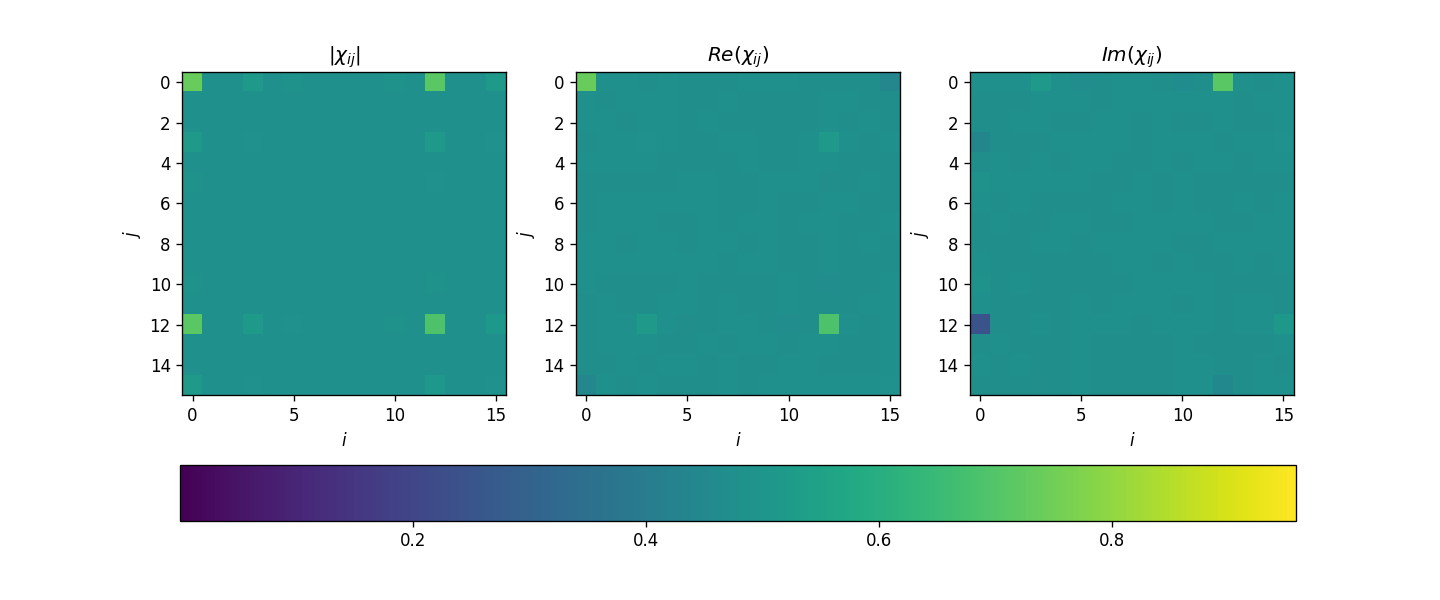

In [207]:
fig, ax = plt.subplots(1, 3, figsize = (12,5))

im0 = ax[0].imshow(np.abs(chi_mat), vmin=-1, vmax=1)
ax[0].set_title("$| \chi_{ij} |$")
ax[0].set_xlabel('$i$')
ax[0].set_ylabel('$j$')


im1 = ax[1].imshow(chi_mat.real, vmin=-1, vmax=1)
ax[1].set_title("$Re( \chi_{ij} )$")
ax[1].set_xlabel('$i$')
ax[1].set_ylabel('$j$')


im2 = ax[2].imshow(chi_mat.imag, vmin=-1, vmax=1)
ax[2].set_title("$Im( \chi_{ij} )$")
ax[2].set_xlabel('$i$')
ax[2].set_ylabel('$j$')

fig.colorbar(im, ax=ax.ravel().tolist(), orientation = 'horizontal')

## Artificial tests

In [109]:
def gate_test_U(state_init, **kwargs): #applique l
    U = kwargs['U']
    
    if state_init.type == "ket": 
        return qtp.Qobj(U) * state_init
    elif state_init.type == "oper":
        return qtp.Qobj(U) * state_init * qtp.Qobj(U).dag()
    else :
        print("Type of state_init not recognized, must be ket or oper")
    

In [142]:
U_CNOT = np.zeros((4,4))
U_CNOT[0,0] = 1
U_CNOT[1,1] = 1
U_CNOT[2,3] = 1
U_CNOT[3,2] = 1
U_CNOT = qtp.Qobj(U_CNOT, dims = [[2,2], [2, 2]])

U_id = qtp.qeye([2,2])

U_0 = qtp.Qobj(np.zeros((4,4)), dims = [[2,2], [2,2]])

sigmai = qtp.sigmax()
sigmaj = qtp.sigmaz()
U_i_j = qtp.tensor(sigmai, sigmaj)

In [143]:
U = U_i_j
param_test = {
    'nb_levels_A' : 2,
    'nb_levels_B' : 2,
    'U' : U
}
param_test['d'] = param_test['nb_levels_A']*param_test['nb_levels_B']

In [146]:
deb = time.time()
lambda_mat = fct_to_lambda(gate_test_U, **param_test)
print("Ca a pris ", time.time() - deb, "secondes")


# plt.figure()
# plt.imshow(np.abs(lambda_mat))
# plt.colorbar()
# plt.title("$| \lambda_{ij} |$")
# plt.xlabel('$i$')
# plt.ylabel('$j$')

Ca a pris  0.16202688217163086 secondes


In [147]:
deb = time.time()
chi_mat = lambda_to_chi(lambda_mat, **param_test)
print("Ca a pris ", time.time() - deb, "secondes")


# plt.figure()
# plt.imshow(np.abs(chi_mat))
# plt.colorbar()
# plt.title("$| \chi_{ij} |$")
# plt.xlabel('$i$')
# plt.ylabel('$j$')


Ca a pris  0.12999582290649414 secondes


It took :  0.25899457931518555  seconds


<IPython.core.display.Javascript object>


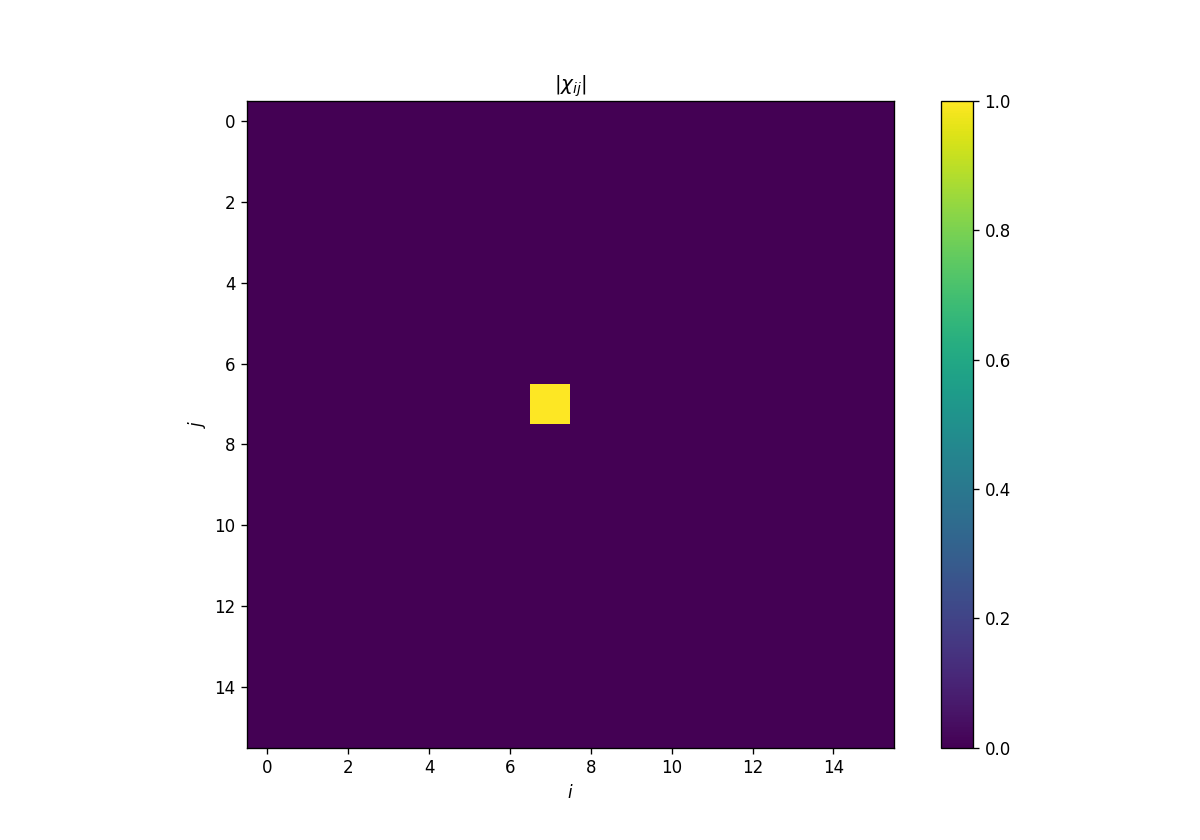

Text(0, 0.5, '$j$')

In [148]:
deb = time.time()
chi_mat = fct_to_chi(gate_test_U, **param_test)
print("It took : ", time.time() - deb ," seconds")

plt.figure()
plt.imshow(np.abs(chi_mat))
plt.colorbar()
plt.title("$| \chi_{ij} |$")
plt.xlabel('$i$')
plt.ylabel('$j$')


<IPython.core.display.Javascript object>


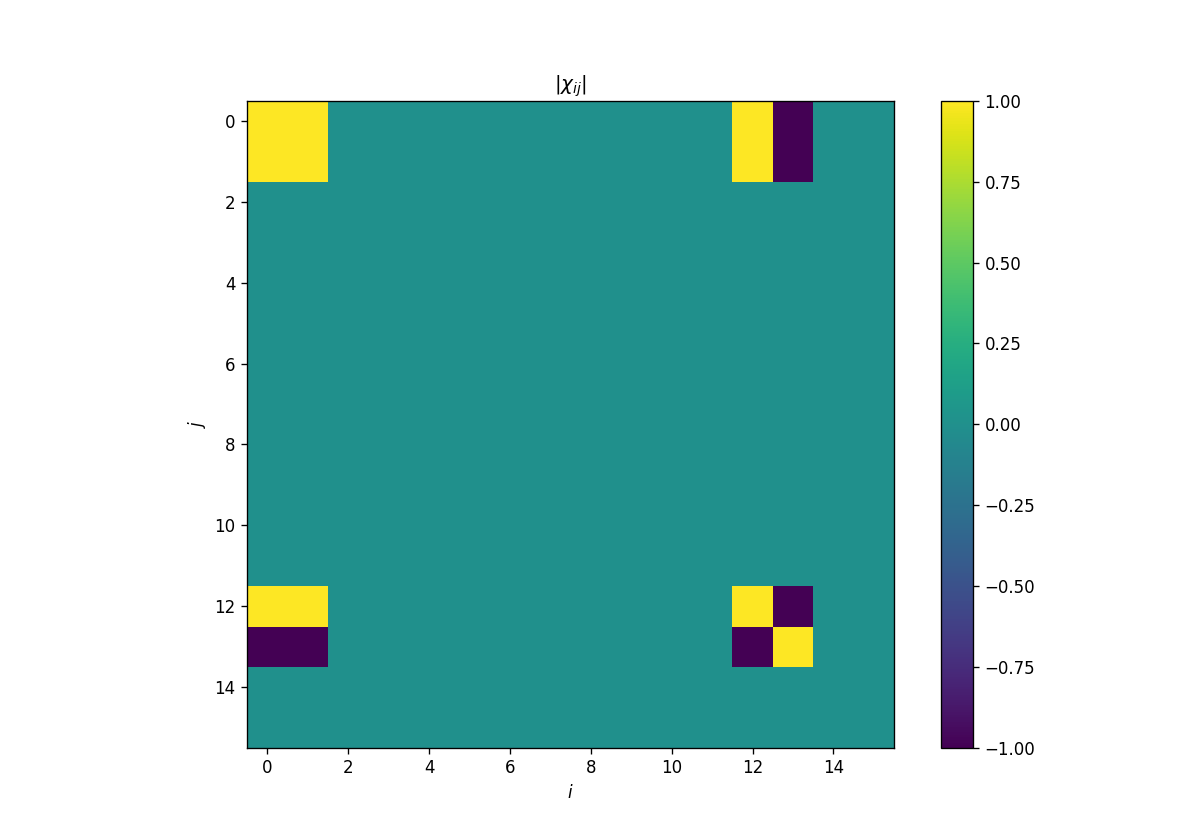

Text(0, 0.5, '$j$')

In [133]:
#Sol CNOT
chi_sol_CNOT = np.zeros((16,16))
chi_sol_CNOT[:2, :2] = 1

chi_sol_CNOT[:2, 12] = 1
chi_sol_CNOT[:2, 13] = -1

chi_sol_CNOT[12, :2] = 1
chi_sol_CNOT[13, :2] = -1

chi_sol_CNOT[13,13] = 1
chi_sol_CNOT[12,12] = 1
chi_sol_CNOT[12,13] = -1
chi_sol_CNOT[13,12] = -1

plt.figure()
plt.imshow((chi_sol_CNOT))
plt.colorbar()
plt.title("$| \chi_{ij} |$")
plt.xlabel('$i$')
plt.ylabel('$j$')


#